## Housekeeping

Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import folium
%pwd

'C:\\Users\\si2320\\Downloads'

## Macro-level Analysis

Let's look at the population distribution in North Carolina and establish some initial descriptive statistics.

In [2]:
tiers = pd.read_excel('NC Development Tier Rankings 2016.xls')
tiers.head()
tiers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   COUNTY                                            100 non-null    object 
 1   Adjusted Property Tax Base Per Capita FY 2015-16  100 non-null    int64  
 2   Population Growth July 2011-July 2014             100 non-null    float64
 3   Median HouseHold Income 2013                      100 non-null    int64  
 4   Unemployment 12 mth avg                           100 non-null    float64
 5   County Rank Sum                                   100 non-null    int64  
 6   Economic Distress Rank                            100 non-null    int64  
 7   Population Less Prison July 2014                  100 non-null    int64  
 8   Poverty Rate 5-year                               100 non-null    float64
 9   2014 tier             

In [3]:
tier_pop = tiers[['COUNTY','Median HouseHold Income 2013', 'Population Less Prison July 2014','Poverty Rate 5-year','Final 2016 Tier']]

In [75]:
tier_pop
#tier_pop.to_excel("NC County Tiers Important Columns Only.xls")

In [5]:
tier_pop.sort_values('Population Less Prison July 2014')

,COUNTY,Median HouseHold Income 2013,Population Less Prison July 2014,Poverty Rate 5-year,Final 2016 Tier
88,TYRRELL,32642,3645,0.208,1
47,HYDE,36681,5077,0.256,1
37,GRAHAM,33553,8829,0.211,1
14,CAMDEN,60537,10251,0.060,1
51,JONES,39602,10468,0.167,1
...,...,...,...,...,...
25,CUMBERLAND,44038,329403,0.170,2
33,FORSYTH,46163,364005,0.186,3
40,GUILFORD,46093,512273,0.181,3
91,WAKE,65433,982473,0.110,3


In [6]:
print(np.mean(tier_pop['Median HouseHold Income 2013']))
print(np.std(tier_pop['Median HouseHold Income 2013']))

41649.33
7488.6385919671675


Mean income in North Carolina was \\$41649.33,  with a Standard Deviation of \\$7488.64

In [7]:
print(np.mean(tier_pop['Population Less Prison July 2014']))
print(np.std(tier_pop['Population Less Prison July 2014']))

99093.59
153343.09877663848


We see that the standard deviation of the population is much higher than the mean population. This indicates that there's some skewing of the population distribution. Let's plot to see this.

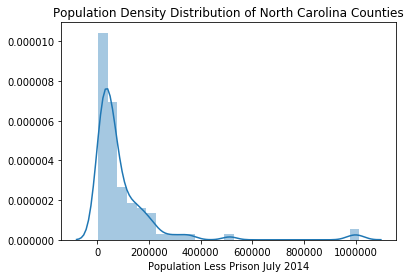

In [72]:
#Standard Deviation is MUCH greater than the mean. Plot population
pop_plot =sns.distplot(tier_pop['Population Less Prison July 2014'], hist= True)
pop_plot.set_title("Population Density Distribution of North Carolina Counties")
#pop_plot.figure.savefig('Population Density Distribution of North Carolina Counties.png', dpi=300)

The frequency of counties seems to trail off after 200,000. Let's zoom in.

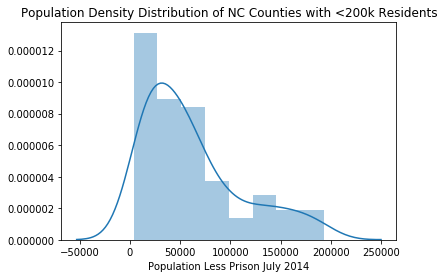

In [71]:
tier_pop_200k = tier_pop.loc[tier_pop['Population Less Prison July 2014'] < 200000]
zoom_plot= sns.distplot(tier_pop_200k['Population Less Prison July 2014'], hist= True)
zoom_plot.set_title("Population Density Distribution of NC Counties with <200k Residents")
#zoom_plot.figure.savefig('Population Density Distribution Under 200k Residents.png', dpi=300)

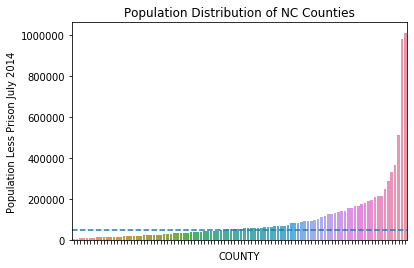

In [66]:
tier_pop_sort = tier_pop.sort_values(by=['Population Less Prison July 2014'])
tier_pop_plot_2 = sns.barplot(x='COUNTY',y='Population Less Prison July 2014',data=tier_pop_sort)
tier_pop_plot_2.axhline(50000, ls='--')
tier_pop_plot_2.set_xticklabels([])
tier_pop_plot_2.set_title("Population Distribution of NC Counties")
#tier_pop_plot_2.figure.savefig('Population Distribution of NC Counties.png', dpi=300)

In [10]:
print(len(tier_pop_200k['Population Less Prison July 2014']))
print(len(tier_pop.loc[tier_pop['Population Less Prison July 2014'] < 50000]))
print(len(tier_pop.loc[tier_pop['Population Less Prison July 2014'] < 10000]))

90
46
3


90% of North Carolina's counties are below 200k in population, and 46% of North Carolina's counties are below 50k.
Using USDA Definitions (https://www.ers.usda.gov/topics/rural-economy-population/rural-classifications/what-is-rural/), this means that 46% of NC counties can be classified as Non-Metro. Non-Metro can be further drilled into Non-Micro, or counties with less than 10000 people. There are 3 such counties in North Carolina.

In [11]:
most_rural = tier_pop.loc[tier_pop['Population Less Prison July 2014'] < 10000]
most_rural

,COUNTY,Median HouseHold Income 2013,Population Less Prison July 2014,Poverty Rate 5-year,Final 2016 Tier
37,GRAHAM,33553,8829,0.211,1
47,HYDE,36681,5077,0.256,1
88,TYRRELL,32642,3645,0.208,1


In [12]:
Most_rural_sum = np.sum(most_rural['Population Less Prison July 2014'])
Total_sum = np.sum(tier_pop['Population Less Prison July 2014'])
print((Most_rural_sum/Total_sum)*100)


0.17711539162119366


In [13]:
kind_of_rural = tier_pop.loc[tier_pop['Population Less Prison July 2014'] < 50000]
kind_of_rural_sum = np.sum(kind_of_rural['Population Less Prison July 2014'])
print((kind_of_rural_sum/Total_sum)*100)

11.597571548270679


North Carolina's most rural counties are .177% of the state's overall population. Expanding the definition to counties below 50k accounts for 11.598% of the state's population-- so while 46% of the state's counties meet some definition of rural, they only hold 11.598% of the total population.

In [14]:
Mecklenburg_County_Percent = ((1013199 / Total_sum) * 100)
print(Mecklenburg_County_Percent)
Wake_County_Percent = ((982473 / Total_sum) * 100)
print(Wake_County_Percent)
Guilford_County_Percent = ((512273 / Total_sum) * 100)
print(Guilford_County_Percent)

Three_biggest = Mecklenburg_County_Percent + Wake_County_Percent + Guilford_County_Percent
print(Three_biggest)

10.224667407851506
9.914596897740813
5.169587659504515
25.308851965096835


In contrast, NC's three biggest counties account for over 25% of the state's population. This is important when considering the Tier designations, especially as the UNC Board of Governors dictated that they want to increase rural population by increasing enrollment from Tier 1 and Tier 2 counties. Let's analyze Tier 1 a bit.

## Tier 1 Analysis

In [73]:
tier_1 = tier_pop.loc[tier_pop['Final 2016 Tier'] == 1]
tier_1.sort_values('Population Less Prison July 2014')
#tier_1.to_excel('Tier 1 Counties.xls')

In [16]:
len(tier_1['Population Less Prison July 2014'])

40

There are 8 Tier 1 counties where the population is >50,000, 20% of the counties in this tier.

In [17]:
tier_1_sum = np.sum(tier_1['Population Less Prison July 2014'])
#print(tier_1_sum)
tier_1_over_50k = tier_1.loc[tier_1['Population Less Prison July 2014'] > 50000]
tier_1_over_50k_sum = np.sum(tier_1_over_50k['Population Less Prison July 2014'])
#print(tier_1_over_50k_sum)
over_50k_percent = (tier_1_over_50k_sum / tier_1_sum) *100
print(over_50k_percent)

44.72243250440595


### 44.72% of Tier 1's population is not rural.

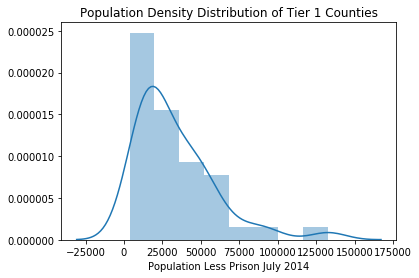

In [62]:
tier_1_plot =sns.distplot(tier_1['Population Less Prison July 2014'])
tier_1_plot.set_title("Population Density Distribution of Tier 1 Counties")
#tier_1_plot.figure.savefig('Population Density Distribution of Tier 1 Counties.png', dpi=300)

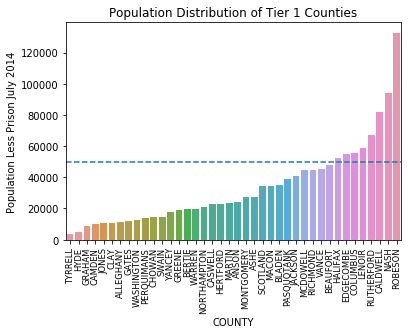

In [63]:
tier_1_sort = tier_1.sort_values(by=['Population Less Prison July 2014'])
tier_1_plot_2 = sns.barplot(x='COUNTY',y='Population Less Prison July 2014',data=tier_1_sort)
tier_1_plot_2.axhline(50000, ls='--')
tier_1_plot_2.set_xticklabels(tier_1_plot_2.get_xticklabels(),rotation=90,  fontsize='small')
tier_1_plot_2.set_title("Population Distribution of Tier 1 Counties")
#tier_1_plot_2.figure.savefig('Population Distribution of Tier 1 Counties.png', dpi=300)

In [129]:
#tier_1.sort_values('Median HouseHold Income 2013')

In [131]:
#first_std= np.mean(tier_pop['Median HouseHold Income 2013']) - np.std(tier_pop['Median HouseHold Income 2013'])
#print(first_std)

In [130]:
#below_std = tier_1.loc[tier_1['Median HouseHold Income 2013'] < first_std]
#below_std.sort_values('Population Less Prison July 2014')

In [132]:
#len(below_std)

There are 15 Tier 1 counties where the Median HouseHold income is more than one standard deviation below the state's median household income. 11 of these counties have a population below 50,000.

## Tier 2 Analysis

In [74]:
tier_2 = tier_pop.loc[tier_pop['Final 2016 Tier'] == 2]
tier_2.sort_values('Population Less Prison July 2014')
#tier_2.to_excel("Tier 2 Counties.xls")

In [23]:
tier_2_over_50k = tier_2.loc[tier_2['Population Less Prison July 2014'] > 50000]
print(len(tier_2_over_50k["Population Less Prison July 2014"]))
print(len(tier_2['Population Less Prison July 2014']))

26
40


26 counties in Tier 2 are not rural, 65% of this tier's counties.

In [137]:
tier_2_sum = np.sum(tier_2['Population Less Prison July 2014'])
#print(tier_2_sum)
tier_2_over_50k = tier_2.loc[tier_2['Population Less Prison July 2014'] > 50000]
tier_2_over_50k_sum = np.sum(tier_2_over_50k['Population Less Prison July 2014'])
#print(tier_2_over_50k_sum)
tier_2_over_50k_percent = (tier_2_over_50k_sum / tier_2_sum) *100
print(tier_2_over_50k_percent)

87.94232592476779


### 87.94 of Tier 2's population is not rural.

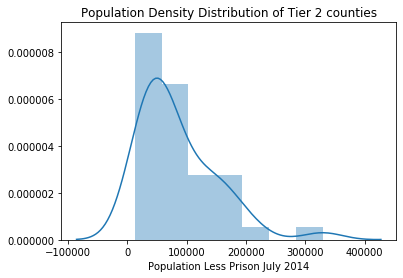

In [64]:
tier_2_plot =sns.distplot(tier_2['Population Less Prison July 2014'])
tier_2_plot.set_title("Population Density Distribution of Tier 2 counties")
#tier_2_plot.figure.savefig('Population Density Distribution of Tier 2 counties.png', dpi=300)

In [34]:
tier_2_sort = tier_2.sort_values(by=['Population Less Prison July 2014'])

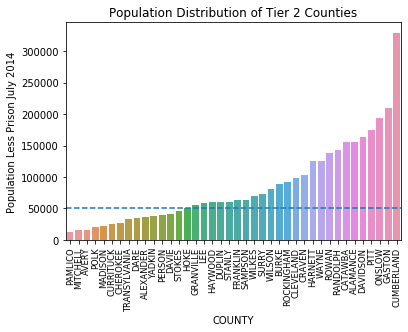

In [65]:
tier_2_plot_2 = sns.barplot(x='COUNTY',y='Population Less Prison July 2014',data=tier_2_sort)
tier_2_plot_2.axhline(50000, ls='--')
tier_2_plot_2.set_xticklabels(tier_2_plot_2.get_xticklabels(),rotation=90,  fontsize='small')
tier_2_plot_2.set_title("Population Distribution of Tier 2 Counties")
#tier_2_plot_2.figure.savefig('Population Distribution of Tier 2 Counties.png', dpi=300)

In [138]:
tier1and2_sum = tier_1_sum + tier_2_sum
tier1and2_over50k =tier_1_over_50k_sum + tier_2_over_50k_sum
tier1and2_over50k_percent = (tier1and2_over50k / tier1and2_sum) *100
print(tier1and2_over50k_percent)

75.75159311196661


### 75.75% of the population in these two tiers is not rural.

This is especially troubling considering that the UNC strategic plan does not make any mention of specifically looking at the rural portion of these two counties:

"*Rural: By fall 2021, increase enrollment
of students from Tier 1 and Tier 2 counties by
11% over fall 2016 levels (an average of 2% per
year) to reduce the existing participation gap
by at least half*" - Page 9, UNC Strategic Plan https://www.northcarolina.edu/wp-content/uploads/reports-and-documents/strategic-plan/unc_strategic_plan.pdf

In [144]:
#kind_of_rural

## Plotting tiers on a map

Let's shift gears quickly and make a map of tier designations.

In [ ]:
#! conda install geopandas

In [60]:
#Directions from https://plotly.com/python/county-choropleth/
import plotly.figure_factory as ff
import geopandas
map_counties= pd.read_csv('nc-commerce-tiers.csv')

values = map_counties['County Distress Ranking Tier'].tolist()
fips = map_counties['Combined FIPS'].tolist()

colorscale = ["#8dd3c7", "#ffffb3", "#bebada", "#fb8072",
              "#80b1d3", "#fdb462", "#b3de69", "#fccde5",
              "#d9d9d9", "#bc80bd", "#ccebc5", "#ffed6f",
              "#8dd3c7", "#ffffb3", "#bebada", "#fb8072",
              "#80b1d3", "#fdb462", "#b3de69", "#fccde5",
              "#d9d9d9", "#bc80bd", "#ccebc5", "#ffed6f",
              "#8dd3c7", "#ffffb3", "#bebada", "#fb8072",
              "#80b1d3", "#fdb462", "#b3de69", "#fccde5",
              "#d9d9d9", "#bc80bd", "#ccebc5", "#ffed6f"]

fig = ff.create_choropleth(
    fips=fips, values=values,
    colorscale=colorscale, round_legend_values=True,
    simplify_county=0, simplify_state=0,
    county_outline={'color': 'rgb(15, 15, 55)', 'width': 0.5},
    state_outline={'width': 1},
    legend_title='Tiers',
    title='North Carolina'
)

fig.layout.template = None
fig.show()

ModuleNotFoundError: No module named 'geopandas'